# chapter3  신경망
- 퍼셉트론과 신경망이 차이점?
- 시그모이드 함수,ReLU
- 다차원 배열 계산
- 소프트맥수 함수

#### 출처 : 밑바닥 부터 시작하는 딥러닝

***
## 3.1 퍼셉트론에서 신경망으로 
### 3.1.1 신경망의 예
- 입력층, 출력층, 은닉층으로 이루어짐
- x1과 x2를 인수로 받는  AND 함수 구현

## 3.2 활성화 함수의 등장
입력 신호의 총합을 출력 신호로 변환하는 함수 : 활성화 함수 (h(x))
단일 퍼셉트론의 경우는 활성화함수로 계단함수를 사용 
신경망의 경운은 시그모이드 함수 사용



In [ ]:
#계단 함수 구현하기1 (실수만 받음)
def step_function1(x):
    if x >0 :
        return 1
    else:
        return 0

#계단함수 구현하기2 ( 넘파이 배열 받음)
def step_function2(x):
    y = x > 0
    return y.astype(np.int)

## 앞으로의 편의성을 위해서 step_function2 사용 

import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x >0, dtype= np.int)

x = np.arange(-5.0,5.0,0.1)
y = step_function2(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()



<Figure size 640x480 with 1 Axes>

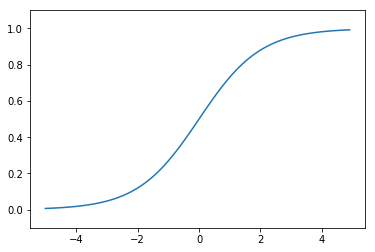

In [32]:
#시그모이드 함수 구현하기
def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

### 3.2.5 시그모이드 함수와 계단 함수 비교
퍼셉트론은 계단함수, 신경망은 시그모이드
계단함수와 시그모이드 함수는 출력이 0~1사이라는 점에서 공통점이 있으며 둘다 비선형 함수(직선1개로 그릴수없음)라는 것도 공통점이다.

### 3.2.6 비선형 함수
신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다. 
은닉층 때문이다. 은닉층이 없으면 신경망이라고 할수 없다.
앞서 XOR를 구현했던 예를 생각하면 쉬울것이다.
선형함수는 층을 아무리 깊게해도 은닉층 없는 네트워크로도 똑같은 기능을 할수 있다. 
선형함수를 이용해서는 여러 층으로 구성하는 이점을 살릴수 없다. 
층을 쌓는 혜택을 얻고 싶다면 비선형 함수를 사용해야한다

### 3.2.7 ReLU함수
계단함수, 시그모이드 함수 이외 최근에 많이 쓰는 활성화 함수.
입력이 0이 넘으면 입력을 그대로 출력, 0이하면 0을 출력

In [33]:
#ReLU 구현
def relu(x):
    return np.maximum(0,x)

### 3.3.3 신경망의 내적

In [34]:
#넘파이 행렬을 써서 신경망 구현하기
#X(입력), W(가중치), Y(출력)의 형상 주의. 특히 X와 W의 대응하는 차원의 원소 수가 같아야 함(행렬곱이 가능하도록!)

X = np.array([1,2])
print(X.shape)
W = np.array([[1,3,5],[2,4,6]])
print(W)
print(W.shape)
Y = np.dot(X,W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


## 3.4 3층 신경망 구현하기

In [38]:
#입력층에서 1층으로 신호 전달

X = np.array([1.0,0.5]) #입력은 두개
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])  #두개의 입력에 대한 1층의 가중치
B1 = np.array([0.1,0.2,0.3])# 전달된 입력에 대한 1층의 편향

print(W1.shape)#(2,3)
print(X.shape)#(2,)
print(B1.shape)#(3,)

A1 = np.dot(X,W1) + B1
Z1 = sigmoid(A1)

print(A1)
print(Z1)

#1층에서 2층으로 신호전달

W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

#2층에서 출력층으로 신호 전달
def identity_function(x):
    return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
(3,)
(3, 2)
(2,)


### 3.4.3 구현정리

In [40]:
#위의 과정을 좀 그럴듯 하게 다시 간단히 구현하면

def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0,0.5])
y = forward(network,x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계하기 

- 신경망은 분류와 회귀 모두에 이용할 수 있다.
- 다만 둘중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라짐
 회귀 : 항등함수 ( 입력 그대로 출력이됨)
 분류 : 소프트맥스 함수 (입력신호의 지수 함수 / 모든 입력 신호의 지수 합수의 합) (출력이 0에서 1.0사이의 실수 값이며, 출력의 총합이 1)
        => 이런 성질로 인해서 소프트맥수 합수의 출력을 '확률'로 해석이 가능함
        
- 출력층 뉴런 수 : 풀려는 문제에 맞게 적절히 정하기. 보통은 분류에서 분류하고 싶은 클래스 수로 설정함

## 3.6 손글씨 숫자 인식
- 이미 학습된 매개변수 사용
- 학습과정 생략하고 추론과정만 구현 
- 신경망의 순전파

In [ ]:
import sys, os
sys.path.append(os.pardir) #부모 디렉터리 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

#처음 한 번은 몇 분 정도 걸림
(x_train, t_train), (x_test, t_test) =  load_mnist(flatten=True,normalize=False)

#각 데이터의 형상 출력
print(x_train.shape) #(60000,784)
print(t_train.shape) #(60000,)
print(x_test.shape) #(10000, 784)
print(t_test.shape) #(10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [2]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,normalize=False)

img = x_train[0]
label = t_train[0]
print(label) #5

print(img.shape) #(784,)
img = img.reshape(28, 28) # 원래 이미지의 모양으로 변형
print(img.shape) #(28,28)

img_show(img)



5
(784,)
(28, 28)


### 3.6.2 신경망의 추론 처리
-MNIST 데이터셋을 가지고 추론 수행하는 신경망 구현하기
- 입력층 뉴런 : 784개, 이미지의 크기가 28x28 (= 784)
- 출력층 뉴런 : 10개 :분류문제로 0 에서 9 까지 구분하는 문제
- 은닉층 총 2개 : 각 50 ,100개 : 임의로 정함

In [1]:
def get_data():
    (x_train, t_train),(x_test,t_test) = \
    load_mnist(normalize=True,flatten=True, one_hot_laber=False) # 전처리
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl",'rb') as f:
        network = pickle.load(f)
        
        return network
    
def predict(network, x): #각 레이블의 확률을 넘파이 배열로 반환
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = softmax(a3)
    
    return y

x, t = get_data() # MNIST 데이터셋 가져오기
network = init_network() # 네트워크 생성

accurary_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i]) #x에 저장된 이미지 데이터를 1장씩 꺼내서 predict()함수로 분류
    p = np.argmax(y) #확률이 가장 높은 원소의 인덱스를 얻는다 (=흐름상 가장 확률의 높은 글자를 찾게됨) = 예측결과
    if p == t[i]: #예측결과와 정답레이블 비교하여 정확도를 구함
        accuracy_cnt += 1 
        
print("Accuracy:" + str(float(accuracy_cnt)/len(x)))

NameError: name 'load_mnist' is not defined

# Chapter 4 신경망 학습

-학습 : 훈련데이터로 부터 가중치 매개변수의 최적 값을 자동으로 획득
-손실함수 : 신경망이 학습할 수 있도록 해주는 지표(손실함수의 결과값ㅇ르 가장 작게 만드는 가중치 매개변수를 찾는것이 학습의 목표)

## 4.1 데이터에서 학습한다!
신경망은 데이터를 보고 학습할 수 있다.(가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다)

### 4.1.1 데이터 주도학습
지도학습 : 사람이 신경씀 + 머신러닝
비지도학습 : 사람이 신경안씀 : 딥러닝

### 4.1.2 훈련 데이터와 시험 데이터

 >데이터 셋을 두개로 나눈다.
   -훈련 데이터 : 학습하면서 최적의 매개변수를 찾음
   -시험 데이터 : 앞서 트레이닝된 모델을 평가
   : 이렇게 두개의 군집으로 나누는 이유는 범용 능력을 평가하고 싶어서
   오버피팅 : 특정 데이터셋에만 지나치게 최적화되서 범용 능력이 떨어짐
   
## 4.2 손실 함수
손실함수 : 신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현하고 그 지표를 가장 좋게 만들어주는 가중치 매개변수를의 값을 탐색한다. 
           신경망 학습에서 사용하는 지표는 '손실함수'이며 손실함수로 보통 평균제곰오차와 교차 엔트로피 오차를 사용한다. 
           



In [58]:
### 4.2.1 평균 제곱 오차
#가장 많이 쓰는 손실함수


#     0    1   2   3   4    5   6   7   8   9
y1 = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]#소프트맥스 함수 출력 결과로, 확률로 설명가능, 2의 확률이 0.6으로 제일 높음
y2 = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]#여기서는 7일확률이 0.6으로 제일 높음

t = [0,0,1,0,0,0,0,0,0,0]#숫자 2에 해당하는 원소 값이 1이미 정답이 '2' => 정답만 1로 표기 나머지는 0으로 나타냄 = 원-핫 인코딩


#평균제곱오차구현
def mean_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)


print(mean_squared_error(np.array(y1),np.array(t)))
#0.09750000000000003  :y1이 정답이 확률 약 97%

print(mean_squared_error(np.array(y2),np.array(t)))
#0.5975  :y2가 정답일 확률 약 59%

#평균 제곰 오차를 기준으로 첫번째 추정결과가 더 정답에 가까움

### 4.2.2 교차 엔트로피 오차
#정답일때의 출력이 전체 값을 정한다.
#예시에서 정답은 "2" ,이때의 신경망 출력은 0.6 => 교차 엔트로피오차는 0.51 같은 조건에서 신경망 출력이 0.1(오답)이라면 2.30으로 오차가 커짐. 
#교차엔트로피오차 구현
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))


print(cross_entropy_error(np.array(y1),np.array(t)))
#0.510825457099338 

print(cross_entropy_error(np.array(y2),np.array(t)))
#2.302584092994546
#교차엔트로피오차를 기준으로 첫번째 추정결과가 더 정답에 가까움


0.09750000000000003
0.5975
0.510825457099338
2.302584092994546


### 4.2.3 미니배치 학습
훈련 데이터에 대한 손실 함수 값을 구하고(오차값은 최소가 되어야함), 그 값을 최대한 줄여주는 매개변수를 찾아냄
훈련데이터가 100개가 있으면 그로부터 계산한 100개의 오차값의 평균을 구함.
훈련데이터가 너무너무 많을 경우 임의로 개수만큼 데이터를 무작위로 골라내서 학습하는데 이를 미니 배치학습이라고함


In [65]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist


## normalize :정규화된 데이터만 배열을 얻음, one_hot_label:정답 위치의 원소만 1이고 나머지가 0인 배열을 얻음
(x_train, t_train),(x_test,t_test) = load_mnist(normalize= True, one_hot_label=True)
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

train_size = x_train.shape[0] #60000
batch_size = 10 #10
# 60000미만의 수에서 무작위로 10개를 고름
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask) #무작위로 뽑힌 10개의 인덱스를 확인할수 있다
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
        batch_size = y.shape[0]
        return -np.sum(np.log(y[np.arange(batch_size),t])) / batch_size
    
    



(60000, 784)
(60000, 10)
[ 8867 20904  6379   391  9729 17997 56447 39453 20874 33596]


### 4.2.5 손실함수를 설정하는 이유

학습의 목표는 '정확도'를 끌어내는 매개변수값을 찾는 것이다. 
그런데 왜 '정확도'라는 지표를 놔두고 '손실함수의 값'이라는 우회적인 방법을 선택하는 걸까?



## 4.3 미분
- 미분 = 한 순간의 변화량
- 수치 미분 : 오차를 포함하는 미분 => 딥러닝에서 말하는 미분
- 해석적미분 : 고등학교때 배우는 미분
- 편미분 : 변수가 여럿인 함수에 대한 미분
신경망에서는 편미분을 사용하는데 모든 가중치 변수에대한 기울기를 구해야하기 때문

## 4.4 기울기
모든 변수의 편미분을 벡터로 정리한 것을 기울기라고 라고 한다.
기울기는 함수의 '가장 낮은 장소(최솟값)'가리킨다. 
기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이다.

### 4.4.1 경사법(경사 하강법)
머신러닝 -> 러닝 단계에서 최적의 매개변수를 찾음.
신경망역시 최적(=손실 함수가 최소가 되는 값) 배개변수(가중치와 편향)을 러닝을 통해 찾아야함. 
기울기를 잘 이용해 함수의 최솟값( 가능한한 작은값)을 찾는것이 것이 경사법 
경사 하강 법을 통해서 머신러닝 최적화를 한다.
학습률 : 한번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값이 얼마나 갱신하는냐를 정하느 것, 너무 작아도 너무 커도 문제.

### 4.4.2 신경망에서의 기울기
신경망 학습에서의 기울기 = 가중지 매개변수에 대한 손실 함수의 기울기

In [84]:
import sys, os
sys.path.append(os.pardir)

import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) #정규분포로 초기화 
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss
    
    
net = simpleNet()
print(net.W) #가중치 매개변수

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

np.argmax(p)

t = np.array([0, 0, 1]) #정답 레이블
net.loss(x,t)

def f(W):
    return net.loss(x,t)

dW = numerical_gradient(f,net.W)
print(dW)

[[-0.57822294 -1.05095302 -0.56104759]
 [ 0.16814516  0.33520498  0.21379606]]
[-0.19560312 -0.32888733 -0.1442121 ]
[[ 0.20492142  0.17935057 -0.38427199]
 [ 0.30738213  0.26902586 -0.57640799]]


## 4.5 학습 알고리즘 구현하기

신경망 학습의 절차

전제
 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라한다.
 
 1단계 - 미니 배치 : 훈련데이터중 일부를 무작위로 가져옴
 2단계 - 기울기 산출 : 미니배치의 손실함수 값을 줄이기 위해 각가중치의 매개변수 기울기를 구한다.
 3단계 = 매개변수 갱신 : 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
 4단계 = 반복

In [90]:
#4.5.2 2층 신경망 클래스 구현하기 

import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        #가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis =1)
        t = np.argmax(t, axis =1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    #x :입력 데이터, t: 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)
    net.params['W1'].shape #(784,100)
    net.params['b1'].shape #(100,)
    net.params['W2'].shape #(100,10)
    net.params['b2'].shape #(10,)
    
    x = np.random.rand(100,784) #더미 입력 데이터(100장 분량)
    y = net.predict(x)
    
    t = np.random.rand(100,10) #더미 정답 레이블(100장 분량)
    
    grads = net.numerical_gradient(x,t) #기울기 계산
    grads['W1'].shape #(784, 100)
    grads['b1'].shape #(100,)
    grads['W2'].shape #(100, 10)
    grads['b2'].shape #(10,)

In [ ]:
#4.5.2 미니배치 학습 구현하기 

import numpy as np

from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet



(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label = True)

train_loss_list = []

#하이퍼파라미터
iters_num = 10000 #반복 횟수
train_size = x_train.shape[0]
batch_size = 100 #미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50,output_size=10)

for i in range(iters_num):
    #미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    #grad = network.gradient(x_batch, t_batch) #성능 개선판!
    
    #매개변수 갱신
    for key in('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    #학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

In [3]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir) 
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

#하이퍼파라미터
iters_num = 10000  #반복 횟수
train_size = x_train.shape[0]
batch_size = 100 #미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
#미니배치 획득
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    #매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    #학습경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.782, 0.7903
train acc, test acc | 0.8777833333333334, 0.8814
train acc, test acc | 0.8986833333333333, 0.9015
train acc, test acc | 0.9077, 0.9109
train acc, test acc | 0.9147166666666666, 0.9157
train acc, test acc | 0.9189, 0.9204
train acc, test acc | 0.9244, 0.926
train acc, test acc | 0.9271333333333334, 0.9286
train acc, test acc | 0.9311166666666667, 0.9315
train acc, test acc | 0.93435, 0.9336
train acc, test acc | 0.93685, 0.9363
train acc, test acc | 0.94, 0.9383
train acc, test acc | 0.9424, 0.9424
train acc, test acc | 0.94385, 0.9431
train acc, test acc | 0.94545, 0.9442
train acc, test acc | 0.9478166666666666, 0.945


<Figure size 640x480 with 1 Axes>

***
# 수고하셨습니다